<a href="https://colab.research.google.com/github/jonesmagalona/dict-python/blob/main/Copy_of_Demo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Data Visualization

- Your task is to clean and explore data for a non-profit organization focused on promoting and increasing youth literacy rates using this literacy rate data. They are particularly interested in understanding where they should focus their next project and what strategies to use to have the biggest impact in increasing youth literacy rates in that area.

    1. The first step in this process is to clean the data to get it ready for analysis. You must:
        - Identify and address any duplicate values
        - Identify and address any missing values in this dataset. Deal with these appropriately. Include a brief description of the method you used to deal with missing values along with a justification for that method.
        - Ensure all columns match the data types listed in the data dictionary.
        - Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)
        - Identify and address any inappropriate or unusual data points (example: age cannot be 325)
    2. The next step is to complete an exploration of the data. This should include:
    - Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.
    - Two different types of multivariate exploratory visualizations.  Each visualization must include a brief interpretation within the code file.

### Data Dictionary
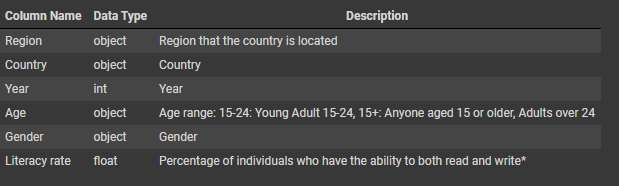

\* *Literacy rate is calculated by taking the number of literate persons in that age and gender group divided by the total number of persons in that group. Literate is defined as the ability to both read and write, with understanding, a short, simple statement about everyday life. Literacy rates at or near 100% indicate that (nearly) every individual in that age range and gender group is able to read and write, at least at a basic level.*

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQuC6rviL9XmnUCpTxHnq7qFOA_hwVNmqrYLYklMkJF4XsyX4NzkHx9NDI04QL6qgHae61larpzdmqd/pub?output=csv"
df = pd.read_csv(url)

df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907


In [3]:
# get overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         4950 non-null   object
 1   Country        4955 non-null   object
 2   Year           4955 non-null   int64 
 3   Age            4955 non-null   object
 4   Gender         4955 non-null   object
 5   Literacy rate  4955 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.4+ KB


## Data Cleaning

### Identify and address any duplicate values

In [4]:
df.duplicated().sum()

0

- There were no duplicates in this data


### Handle Missing Values

In [5]:
df.isna().sum()

Region           5
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

- There are 5 missing values in the Region Column.


In [6]:
# select the samples that has missing values in the Region column
df[df['Region'].isna()]

,Region,Country,Year,Age,Gender,Literacy rate
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
464,NaN,Uzbekistan,2016,65+,female,0.9966975
465,NaN,Uzbekistan,2016,65+,male,0.9990176
466,NaN,Uzbekistan,2016,65+,total,0.9977188


In [7]:
# check to see if rows with same county exist
# if so, what is the region value
a_filter = df['Country']=='Afghanistan'
u_filter = df['Country']=='Uzbekistan'

df[u_filter]

,Region,Country,Year,Age,Gender,Literacy rate
419,Central and Southern Asia,Uzbekistan,2013,15+,female,0.9999587
420,Central and Southern Asia,Uzbekistan,2013,15+,male,0.9999383
421,Central and Southern Asia,Uzbekistan,2013,15+,total,0.9999486
422,Central and Southern Asia,Uzbekistan,2013,15-24,female,1
423,Central and Southern Asia,Uzbekistan,2013,15-24,male,1
424,Central and Southern Asia,Uzbekistan,2013,15-24,total,1
425,Central and Southern Asia,Uzbekistan,2013,25-64,female,1
426,Central and Southern Asia,Uzbekistan,2013,25-64,male,1
427,Central and Southern Asia,Uzbekistan,2013,25-64,total,1
428,Central and Southern Asia,Uzbekistan,2013,65+,female,0.9993467


In looking at the data and rows with the same countries I can see that the region for all missing values should be Central & Southern Asia

In [8]:
# fill in missing values with findings
df['Region'].fillna("Central and Southern Asia", inplace=True)

In [9]:
df.isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

In [10]:
# check data types
df.dtypes

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object

Literacy Rate should be a float but it is an object

In [11]:
df['Literacy rate'].sort_values()

4688     0.004025
3989    0.0054559
4700    0.0071783
3821    0.0135646
4385    0.0156074
          ...    
426             1
425             1
451             1
422             1
18         45.38%
Name: Literacy rate, Length: 4955, dtype: object

Recognize 2 things:
- Someone added a % sign whihc made it an object
- 1 is the highest value (outside of problem row) so I will assume that 1 = 100% meani I will have to convert this value as well.

In [12]:
percent_filter = df['Literacy rate'].str.contains('%')
df[percent_filter]

,Region,Country,Year,Age,Gender,Literacy rate
18,Central and Southern Asia,Afghanistan,2018,25-64,male,45.38%


In [13]:
df['Literacy rate'] = df['Literacy rate'].str.replace('%', '')

In [14]:
df.dtypes

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object

In [15]:
df['Literacy rate'] = df['Literacy rate'].astype(float)

In [16]:
df['Literacy rate'].sort_values()

4688     0.004025
3989     0.005456
4700     0.007178
3821     0.013565
4385     0.015607
          ...    
426      1.000000
425      1.000000
451      1.000000
422      1.000000
18      45.380000
Name: Literacy rate, Length: 4955, dtype: float64

In [17]:
df.loc[percent_filter, 'Literacy rate'] = df.loc[percent_filter, 'Literacy rate'] / 100

In [18]:
df.loc[percent_filter, 'Literacy rate']

18    0.4538
Name: Literacy rate, dtype: float64

### Identify any Inconsistencies with Data

In [19]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Region', 'Country', 'Age', 'Gender'], dtype='object')

In [20]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Region
Latin America and the Caribbean     1410
Sub-Saharan Africa                  1155
Northern Africa and Western Asia     852
Europe and Northern America          504
Central and Southern Asia            467
Eastern and South-Eastern Asia       423
Oceania                              144
Name: Region, dtype: int64



- Column= Country
Mexico                 108
Uruguay                108
Brazil                 108
Palestine               96
Turkey                  96
                      ... 
Trinidad and Tobago     12
Greece                  12
Estonia                 12
Hungary                 12
Antigua and Barbuda      6
Name: Country, Length: 155, dtype: int64



- Column= Age
15+      1260
15-24    1239
25-64    1239
65+      1217
Name: Age, dtype: int64



- Column= Gender
female    1652
total     1652
male      1651
Name: Gender, dtype: int64





In [21]:
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

Mexico                                        108
Uruguay                                       108
Brazil                                        108
Palestine                                      96
Turkey                                         96
Bangladesh                                     96
Argentina                                      96
Azerbaijan                                     96
Ecuador                                        96
Spain                                          96
Honduras                                       96
Singapore                                      87
Dominican Republic                             84
Paraguay                                       84
Kuwait                                         72
Oman                                           72
Colombia                                       72
El Salvador                                    72
South Africa                                   72
Pakistan                                       72


In [22]:
df['Age'].replace({'15+':'<15'}, inplace=True)
df['Age'].value_counts()

<15      1260
15-24    1239
25-64    1239
65+      1217
Name: Age, dtype: int64

In [23]:
df.describe()

,Year,Literacy rate
count,4955.000000,4955.000000
mean,2013.987891,0.816947
std,2.746204,0.232560
min,2010.000000,0.004025
25%,2011.000000,0.722507
50%,2014.000000,0.930676
75%,2016.000000,0.985078
max,2018.000000,1.000000


## Visualizations

Make a correlation map of the variables to see which are related.

In [24]:
# map categorical values into numbers
from sklearn.compose import make_column_selector

df_temp = df.copy()

# for each categorical columns
cat_selector = make_column_selector(dtype_include='object')
cat_data = df_temp[cat_selector(df_temp)]

# for each categorical columns
for c_name in cat_data.columns:
    
    # print the column name
    print(c_name)

    # get unique values from that column
    values_list = df_temp[c_name].unique()

    # initialize the dictionary (mapper)
    col_dictionary = dict()

    # for each value in that column
    for index, value in enumerate(values_list):
        
        # add the 'value: index' to the dictionary
        col_dictionary[value] = index

    #print(col_dictionary)

    # replace values in that column
    df_temp[c_name].replace(col_dictionary, inplace=True)

df_temp.head()

Region
Country
Age
Gender


,Region,Country,Year,Age,Gender,Literacy rate
0,0,0,2011,0,0,0.176121
1,0,0,2011,0,1,0.454171
2,0,0,2011,0,2,0.317411
3,0,0,2011,1,0,0.321132
4,0,0,2011,1,1,0.618791


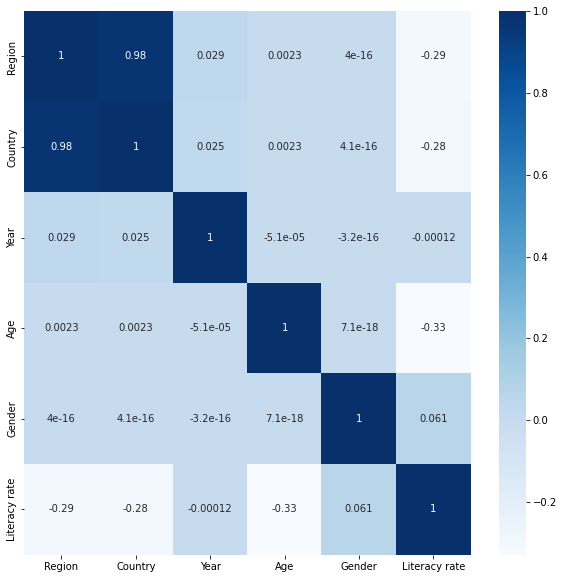

In [25]:
# create a correlation between the columns
correlation = df_temp.corr()

# plot
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap='Blues', annot=True);

### Univariate Analysis

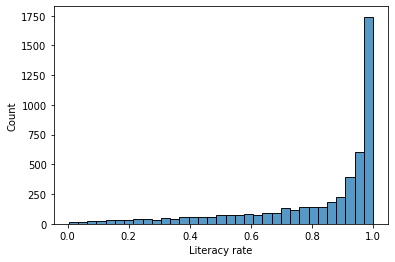

In [26]:
# use histogram to look at dictribution of Literacy Rates
sns.histplot(data=df, x='Literacy rate');

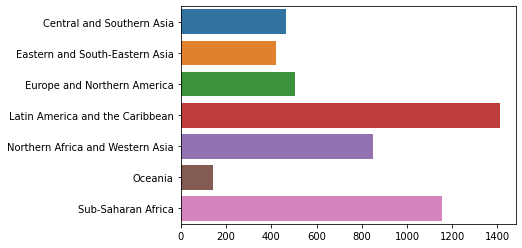

In [27]:
# create a barplot using 'Region'

# get value counts and sort by index
temp = df['Region'].value_counts()
temp = temp.sort_index()

# barplot
sns.barplot(y=temp.keys(), x=temp.values);

### Multivariate Analysis

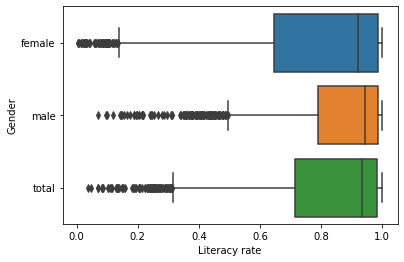

In [28]:
# create a boxplot using 'Literacy rate' and 'Gender'
sns.boxplot(data=df, x='Literacy rate', y='Gender');

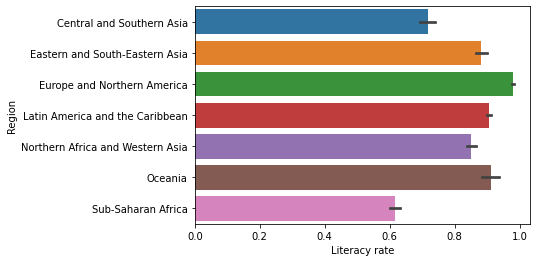

In [29]:
# create a barplot using 'Literacy rate' and 'Region'
sns.barplot(data=df, x='Literacy rate', y='Region');